In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
            
class mPerceptron:
    
    def __init__(self, i, h, o, a):
        self.i = i
        self.h = h
        self.o = o
        self.a = a
    #weight matrix, number of rows=number of hidden units, number of columns= number of input units
        self.Wih=np.random.rand(self.i,self.h)
        self.Who=np.random.rand(self.h, self.o)
        
    def step_func(self, x):
        return 1/(1+np.exp(-x))
        
    def train(self, inputs, target):
        #format array-  matrix multiplication 이 가능하도록 2차원  매트릭스로 바꾸어 준다
        I=np.array(inputs, ndmin=2)
        T=np.array(target, ndmin=2)
                
        #Forward propagation
        hsum=np.dot(I, self.Wih)
        H=self.step_func(hsum)
        osum=np.dot(H,self.Who)
        Y=self.step_func(osum)
        
            
        #Error calculation
        delta=T-Y
        #Hidden layer Error backpropagated-간단히 weight matrix 를 transpose 해서 dot product 계산
        hdelta=np.dot(delta, self.Who.T)
        
        
        
        #Now update the  weight and bias
        self.Who += self.a*np.dot(H.T, delta*Y*(1-Y))
        self.Wih += self.a*np.dot(I.T, hdelta*H*(1-H))
                
    def test(self, inputs):
        #format array
        I=np.array(inputs, ndmin=2)
        
        #Forward propagation
        hsum=np.dot(I, self.Wih)
        H=self.step_func(hsum)
        osum=np.dot(H,self.Who)
        Y=self.step_func(osum)
        
        return Y
        
# Read file and preprocessing
iris=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

#One-hot encoding
temp=pd.get_dummies(iris[4])
temp.replace({1:0.99,0:0.01},inplace=True)

X=iris.iloc[0:150,:4].to_numpy()
X/=[7.9,4.4,6.9,2.5]
T=temp.iloc[0:150,:3].to_numpy()

#Beginning of Perceptron     
n_trials=200
n_test=20
a=0.02
i=4
h=50
o=3
hit_array=[]
  

my=mPerceptron(i,h,o,a)

#Now train the perceptron
for j in range(n_trials):
    for i in range (len(X)):
            my.train(X[i],T[i])
            
    hit=0
    for i in range (n_test):
        s=np.random.randint(0,149)           
        if((np.argmax(T[s])) == (np.argmax(my.test(X[s])))):
           hit+=1
    
    hit_array.append(hit)
  
plt.plot(hit_array)
plt.show()



In [2]:
# Read file and preprocessing
iris=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

#One-hot encoding
temp=pd.get_dummies(iris[4])
temp.replace({1:0.99,0:0.01},inplace=True)

X=iris.iloc[0:150,:4].to_numpy()
X/=[7.9,4.4,6.9,2.5]
T=temp.iloc[0:150,:3].to_numpy()





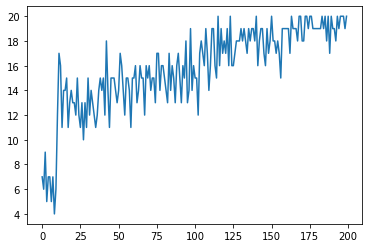

In [7]:
#Beginning of Perceptron     
n_trials=200
n_test=20
a=0.02
i=4
h=50
o=3
hit_array=[]
  

my=mPerceptron(i,h,o,a)

#Now train the perceptron
for j in range(n_trials):
    for i in range (len(X)):
            my.train(X[i],T[i])
            
    hit=0
    for i in range (n_test):
        s=np.random.randint(0,149)           
        if((np.argmax(T[s])) == (np.argmax(my.test(X[s])))):
           hit+=1
    
    hit_array.append(hit)
  
plt.plot(hit_array)
plt.show()

